# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(111)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Request the data
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
long = []
Max_temp= []
Humidity= []
Cloudiness= []
Wind_speed= []
Country= []
city_info = []
Date= []

# Build query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
# counter to count the number of calls to API
count = 1
# counter to count the number of call sets
sets = 0 


print(f'Beginning Data Retrieval')
print(f'------------------------')
for city in cities:
    try:
        
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response= requests.get(query_url + city).json()
#         pprint(response)
        city_info.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
       
        
        count = count+1
        sets = sets+1
        time.sleep(1.01)

        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue    



print(f'------------------------')        
print(f'Data Retrieval Complete')  
print(f'------------------------') 



Beginning Data Retrieval
------------------------
Processing Record 1 of Set 0 | khuldabad
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 2 | soe
Processing Record 4 of Set 3 | atasu
Processing Record 5 of Set 4 | lebu
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 6 | hobart
Processing Record 8 of Set 7 | asau
Processing Record 9 of Set 8 | ahipara
Processing Record 10 of Set 9 | khatanga
Processing Record 11 of Set 10 | mataura
Processing Record 12 of Set 11 | bluff
Processing Record 13 of Set 12 | dharchula
Processing Record 14 of Set 13 | arlit
Processing Record 15 of Set 14 | westport
Processing Record 16 of Set 15 | victoria
Processing Record 17 of Set 16 | punta arenas
Processing Record 18 of Set 17 | saskylakh
Processing Record 19 of Set 18 | jasper
Processing Record 20 of Set 19 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 19 | bethel
Processing Record 21 of Set 20 | illoqqortoormiut
City not found. Skipping...


Processing Record 159 of Set 158 | hami
Processing Record 160 of Set 159 | rio grande
Processing Record 161 of Set 160 | mahebourg
Processing Record 162 of Set 161 | bukama
Processing Record 163 of Set 162 | rzhev
Processing Record 164 of Set 163 | lazaro cardenas
Processing Record 165 of Set 164 | morondava
Processing Record 166 of Set 165 | novikovo
Processing Record 167 of Set 166 | mino
Processing Record 168 of Set 167 | umzimvubu
City not found. Skipping...
Processing Record 168 of Set 167 | comodoro rivadavia
Processing Record 169 of Set 168 | zhangjiakou
Processing Record 170 of Set 169 | mollendo
Processing Record 171 of Set 170 | sortavala
Processing Record 172 of Set 171 | lima
Processing Record 173 of Set 172 | faanui
Processing Record 174 of Set 173 | calama
Processing Record 175 of Set 174 | hithadhoo
Processing Record 176 of Set 175 | lieksa
Processing Record 177 of Set 176 | matameye
City not found. Skipping...
Processing Record 177 of Set 176 | satitoa
City not found. S

Processing Record 322 of Set 321 | bolungarvik
City not found. Skipping...
Processing Record 322 of Set 321 | los llanos de aridane
Processing Record 323 of Set 322 | baghmara
Processing Record 324 of Set 323 | mpika
Processing Record 325 of Set 324 | aklavik
Processing Record 326 of Set 325 | nanma
Processing Record 327 of Set 326 | ceres
Processing Record 328 of Set 327 | paamiut
Processing Record 329 of Set 328 | grand falls
Processing Record 330 of Set 329 | lengshuitan
Processing Record 331 of Set 330 | coquimbo
Processing Record 332 of Set 331 | flinders
Processing Record 333 of Set 332 | baykit
Processing Record 334 of Set 333 | sarkand
Processing Record 335 of Set 334 | nome
Processing Record 336 of Set 335 | hambantota
Processing Record 337 of Set 336 | necochea
Processing Record 338 of Set 337 | yamada
Processing Record 339 of Set 338 | tawkar
City not found. Skipping...
Processing Record 339 of Set 338 | gizo
Processing Record 340 of Set 339 | san vicente
Processing Record 3

Processing Record 493 of Set 492 | sistranda
Processing Record 494 of Set 493 | haysville
Processing Record 495 of Set 494 | talcahuano
Processing Record 496 of Set 495 | beyneu
Processing Record 497 of Set 496 | nuuk
Processing Record 498 of Set 497 | zheshart
Processing Record 499 of Set 498 | sovetskiy
Processing Record 500 of Set 499 | narsaq
Processing Record 501 of Set 500 | inhambane
Processing Record 502 of Set 501 | richards bay
Processing Record 503 of Set 502 | misratah
Processing Record 504 of Set 503 | salalah
Processing Record 505 of Set 504 | svetlaya
Processing Record 506 of Set 505 | rivadavia
Processing Record 507 of Set 506 | tofield
Processing Record 508 of Set 507 | isla mujeres
Processing Record 509 of Set 508 | coihaique
Processing Record 510 of Set 509 | vadso
Processing Record 511 of Set 510 | moroto
Processing Record 512 of Set 511 | bonthe
Processing Record 513 of Set 512 | zhezkazgan
Processing Record 514 of Set 513 | evensk
Processing Record 515 of Set 514 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Put the information into dataframe

city_df= pd.DataFrame({"City": city_info,
                       "Lat": lat,
                       "Lng": long,
                        "Max Temp": Max_temp,
                        "Humidity": Humidity,
                        "Cloudiness": Cloudiness,
                        "Wind Speed": Wind_speed,
                        "Country": Country,
                         "Date": Date})
city_df.to_csv("../Resources/city_df.csv", header= True)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khuldābād,20.0500,75.1833,53.60,62,15,4.47,IN,1612748001
1,Albany,42.6001,-73.9662,26.01,54,82,5.01,US,1612747614
2,Soe,-9.8607,124.2840,75.94,85,100,7.49,ID,1612748003
3,Atasū,48.6814,71.6433,34.61,97,100,31.63,KZ,1612748004
4,Lebu,-37.6167,-73.6500,58.01,95,90,0.65,CL,1612748005


In [5]:
#delete country, city column
num= city_df.drop(["City", "Country"], axis=1)

#caltulate mean, std, etc
count= num.count()
mean= num.mean()
std=num.std()
minimum= num.min()
maximum= num.max()
lower=num.quantile(0.25)
median= num.quantile(0.5)
upper= num.quantile(0.75)

mean_df= pd.DataFrame({"Count":count,
                      "Mean":mean,
                     "Std":std,
                      "Min":minimum,
                      "25%":lower,
                       "50%":median,
                       "75%": upper,
                     "Max":maximum})
                     
stats=mean_df.transpose()
stats   

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
Mean,19.097476,24.816413,49.739058,74.818493,51.907534,8.394640,1.612748e+09
Std,33.487927,88.319402,31.327242,18.143452,40.383348,6.071756,2.168960e+02
Min,-54.800000,-175.200000,-36.510000,11.000000,0.000000,0.510000,1.612748e+09
25%,-8.503425,-53.788450,27.000000,67.000000,4.000000,4.120000,1.612748e+09
50%,22.323300,28.849850,60.800000,79.000000,52.000000,6.910000,1.612748e+09
75%,47.989650,101.463400,75.250000,87.000000,93.000000,11.197500,1.612748e+09
Max,78.218600,179.316700,94.690000,100.000000,100.000000,46.640000,1.612749e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
hum_stat = city_df["Humidity"].describe(include = "all")
hum_stat

count    584.000000
mean      74.818493
std       18.143452
min       11.000000
25%       67.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [7]:

#  Get the indices of cities that have humidity over 100%.
high_humididy= city_df[city_df["Humidity"]>100].index
high_humididy

Int64Index([], dtype='int64')

In [8]:
#Calculate outliers

clean_city_data= city_df.drop(high_humididy, inplace=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

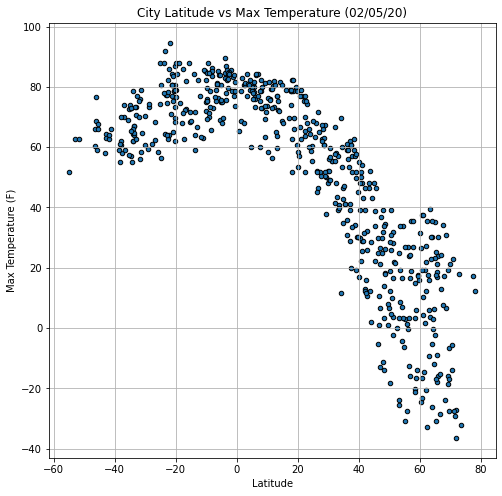

In [29]:
#Scatter plot of Max temperature Vs Latitude
city_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), edgecolors= "black",
              title="City Latitude vs Max Temperature (02/05/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../Pictures/scatter_tempvslat.png")

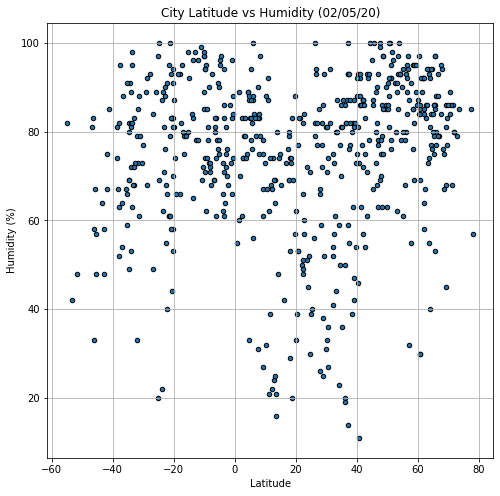

In [30]:
#Scatter plot of  Humidity Vs Latitude
city_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), edgecolors= "black",
              title="City Latitude vs Humidity (02/05/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("../Pictures/scatter_humvslat.png")

## Latitude vs. Cloudiness Plot

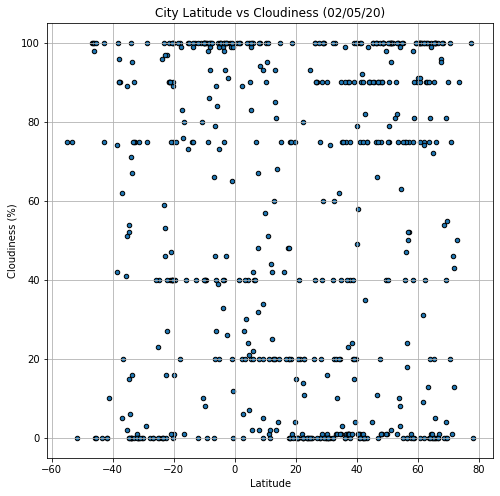

In [31]:
#Scatter plot of  cloudiness Vs Latitude
city_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), edgecolors= "black",
              title="City Latitude vs Cloudiness (02/05/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("../Pictures/scatter_cloudvslat.png")

## Latitude vs. Wind Speed Plot

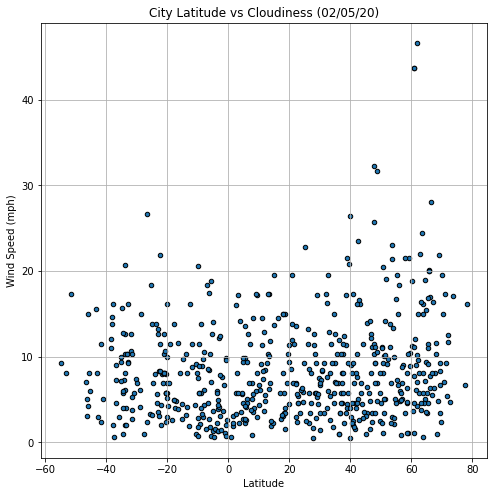

In [32]:
#Scatter plot of  Wind Speed Vs Latitude
city_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), edgecolors= "black",
              title="City Latitude vs Cloudiness (02/05/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("../Pictures/scatter_windvslat.png")

## Linear Regression

In [13]:
#create Northern and Southern temp
north= city_df.loc[city_df["Lat"]>0, :]
south= city_df.loc[city_df["Lat"]<0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.8675834683188343


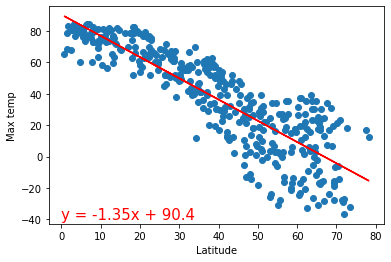

<Figure size 432x288 with 0 Axes>

In [33]:
# Add the linear regression equation and line to plot
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temp')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/North_tempvslat.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.6013306995281967


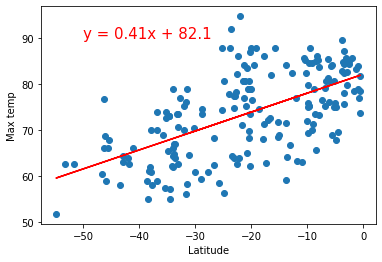

<Figure size 432x288 with 0 Axes>

In [34]:
# Add the linear regression equation and line to plot
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temp')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/south_tempvslat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.2964180194730151


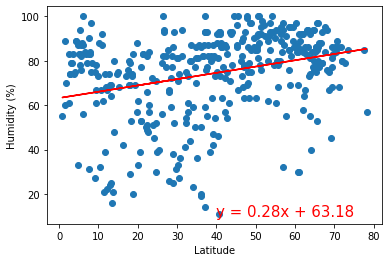

<Figure size 432x288 with 0 Axes>

In [35]:
# Add the linear regression equation and line to plot
x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/North_humivslat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.2884234016774244


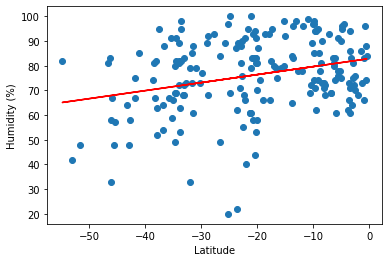

<Figure size 432x288 with 0 Axes>

In [36]:
# Add the linear regression equation and line to plot
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/south_humivslat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.14988497146817212


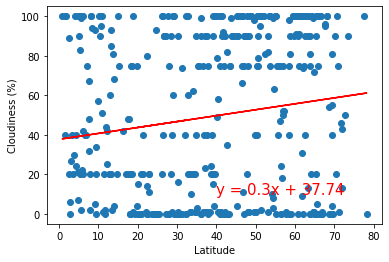

<Figure size 432x288 with 0 Axes>

In [37]:
# Add the linear regression equation and line to plot
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/North_cloudvslat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.2627947149504867


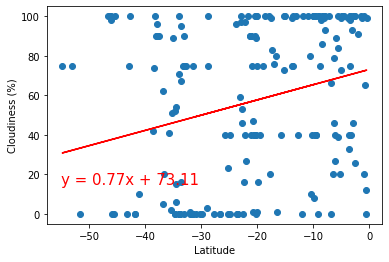

<Figure size 432x288 with 0 Axes>

In [38]:
# Add the linear regression equation and line to plot
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/south_cloudvslat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.19701843933732094


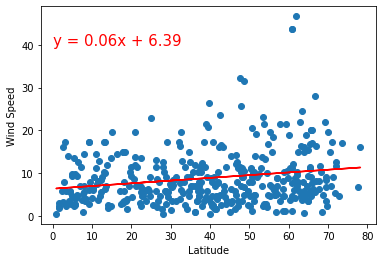

<Figure size 432x288 with 0 Axes>

In [39]:
# Add the linear regression equation and line to plot
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/North_windvslat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.18401082078470246


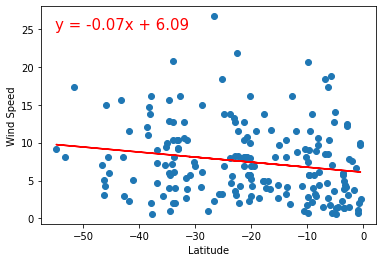

<Figure size 432x288 with 0 Axes>

In [28]:
# Add the linear regression equation and line to plot
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Wind Speed ')

print(f"The r-value is:{rvalue}")
plt.show()
plt.savefig("../Pictures/South_LatVsWind.png")